# SPAM SMS DETECTION

##  Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer as ps
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import pickle
import streamlit as st

## Reading and Describing the Dataset

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.rename(columns={'v1':'Type', 'v2':'Message'}, inplace=True)

In [7]:
df.head()

,Type,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.describe()

,Type,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


#### Droping unwanted columns in dataframe

In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
encoder =LabelEncoder()
df['Type']=encoder.fit_transform(df['Type'])

In [11]:
df[df['Type']==1]

,Type,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


#### Finding how many duplicate values

In [12]:
df.duplicated().sum()

403

In [53]:
df.isnull().sum()

Type                0
Message             0
no_of_characters    0
no_of_words         0
no_of_sentences     0
Updated_msg         0
dtype: int64

#### Droping the duplicate values

In [54]:
df=df.drop_duplicates()

In [55]:
df.count()

Type                5169
Message             5169
no_of_characters    5169
no_of_words         5169
no_of_sentences     5169
Updated_msg         5169
dtype: int64

In [16]:
df[df['Type']==1]

,Type,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


## Data Visualisation

#### How many Spam and Non-Spam Messages

In [17]:
df['Type'].value_counts()

0    4516
1     653
Name: Type, dtype: int64

Here 0 represents Ham (not spam) and 1 represents Spam

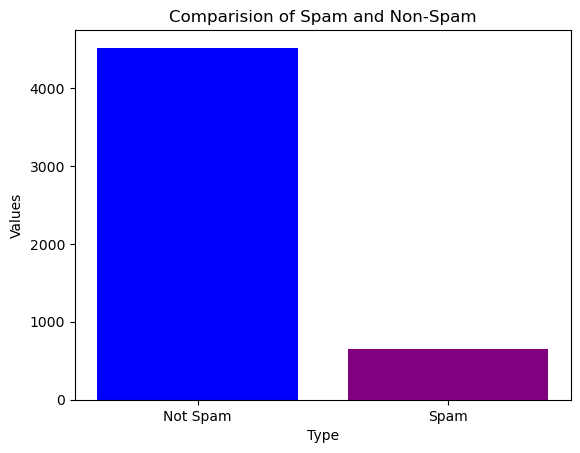

In [18]:
label = ['Not Spam','Spam']
values = df['Type'].value_counts()
colors = ['blue', 'purple']
plt.bar(label,values,color= colors)
plt.title('Comparision of Spam and Non-Spam')
plt.xlabel('Type')
plt.ylabel('Values')
plt.show()

#### Finding no of characters, Words, Sentences

In [3]:
# No of Characters

In [19]:
df['no_of_characters']=df['Message'].apply(len)
df.head()

,Type,Message,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [2]:
# No of Words

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\N
[nltk_data]     Vishnu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
df['no_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Type,Message,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [1]:
# No of Sentences

In [21]:
df['no_of_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Type,Message,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### For Ham messages

In [23]:
df[df['Type']==0][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### For spam messages

In [25]:
df[df['Type']==1][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### Visualization of No of Words, Characters, Sentences

<Axes: xlabel='no_of_words', ylabel='Count'>

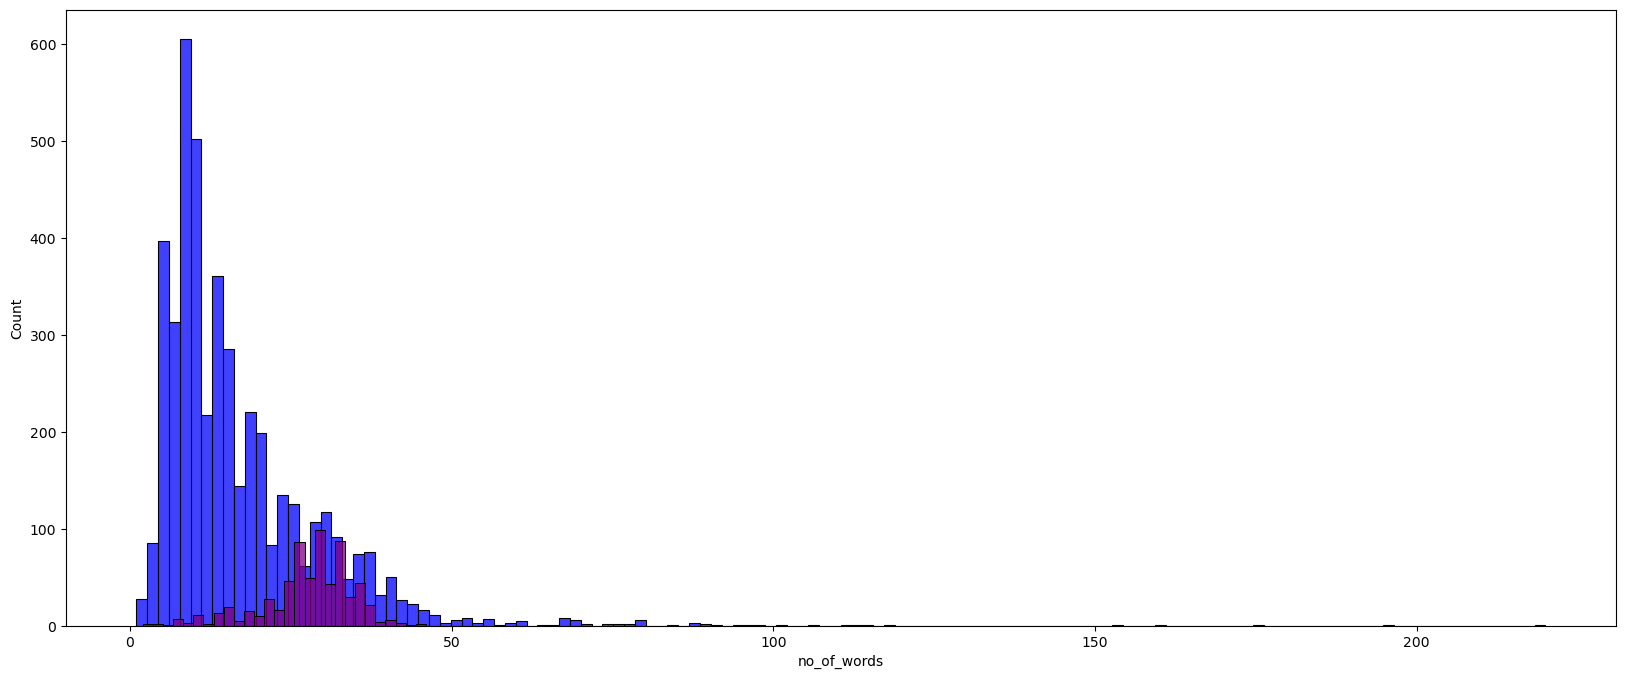

In [26]:
plt.figure(figsize=(20,8))
sns.histplot(df[df['Type']==0]['no_of_words'],color='Blue')
sns.histplot(df[df['Type']==1]['no_of_words'],color='Purple')

C:\Users\N Vishnu\AppData\Local\Temp\ipykernel_18636\2078983525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'cool')


<Axes: >

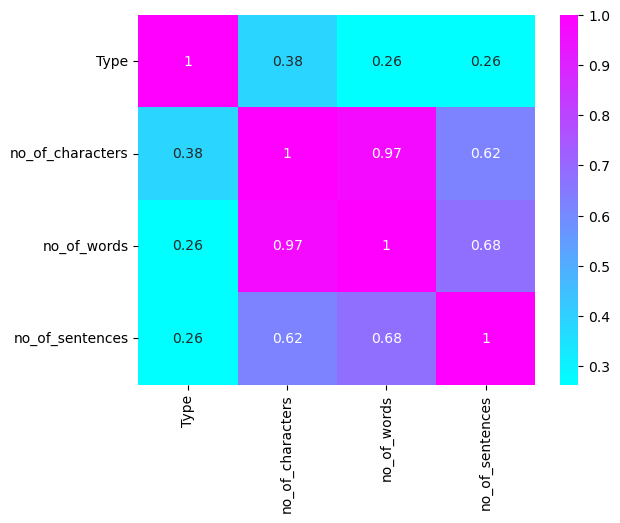

In [27]:
sns.heatmap(df.corr(), annot=True, cmap = 'cool')

## Data Preprocessing

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\N
[nltk_data]     Vishnu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
swe = stopwords.words('english')
len(swe)

179

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Updation of Message                

##### which performs lowercase, checking punctuatuions and stopwords and also stemming function

In [123]:
def Msg_transform(Message):
    Message=Message.lower() 
    Message=nltk.word_tokenize(Message)
    y=[] 
    for i in Message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    Message=y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

In [114]:
df['Updated_msg']=df['Message'].apply(Msg_transform)
df.head()

,Type,Message,no_of_characters,no_of_words,no_of_sentences,Updated_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


## Performing Wordcloud

In [45]:
wc=WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

#### Spam WordCloud

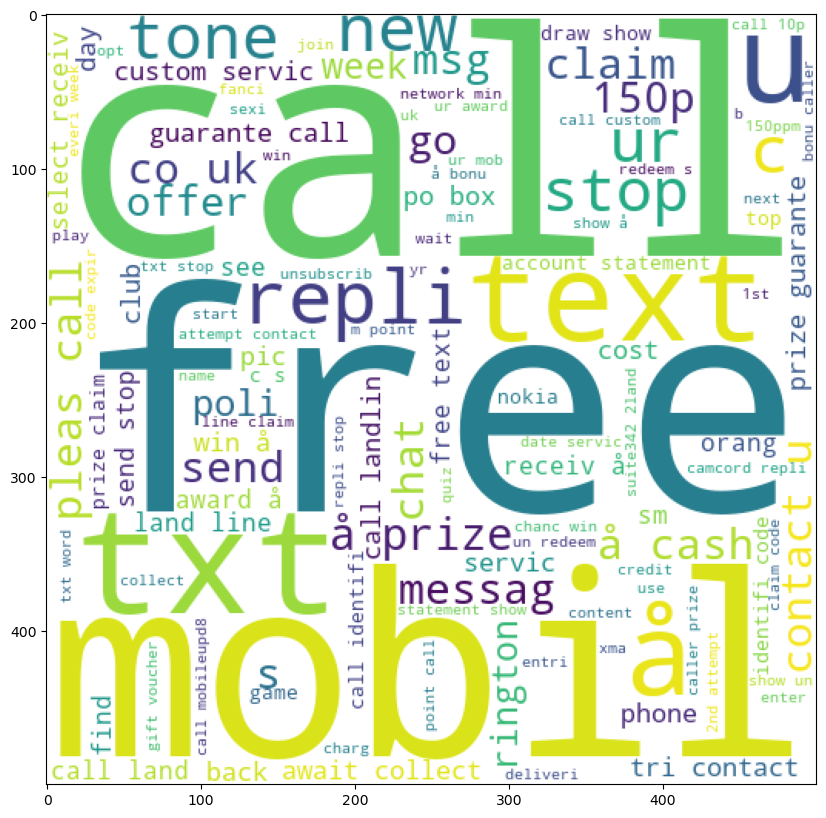

In [49]:
wc_spam = wc.generate(df[df['Type']==1]['Updated_msg'].str.cat(sep=''))
plt.figure(figsize=(16,10))
plt.imshow(wc_spam)

#### Ham WordCloud

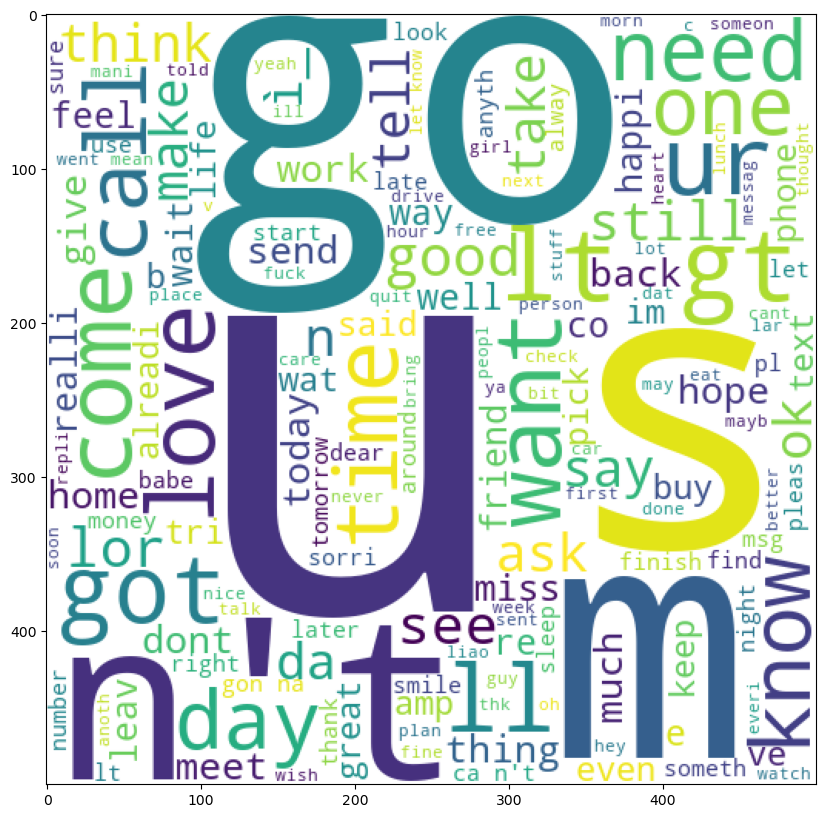

In [54]:
wc_ham = wc.generate(df[df['Type']==0]['Updated_msg'].str.cat(sep=''))
plt.figure(figsize = (16,10))
plt.imshow(wc_ham)

## Model Creation

##### Model using navie bayes

TF-IDF

In [59]:
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
X = tfidf.fit_transform(df['Updated_msg']).toarray()
y = df['Type'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##### now we are going to find the Accuracy score, confusion Matrix and Precision Score 

##### of all 3 types of Naive Bayes and selecting the best one out

In [69]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

##### GaussianNB

In [72]:
gnb.fit(X_train,y_train)
pre1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,pre1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,pre1))
print('Precision score of the Gaussian NB is',precision_score(y_test,pre1))

Accuracy score of Gaussian NB is:  0.8733075435203095
Confusion Matrix of Guassian NB is:  [[774 111]
 [ 20 129]]
Precision score of the Gaussian NB is 0.5375


##### MultinomialNB 

In [73]:
mnb.fit(X_train,y_train)
pre2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,pre2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,pre2))
print('Precision score of the Multinomial NB is',precision_score(y_test,pre2))


Accuracy score of Multinomial NB is:  0.9680851063829787
Confusion Matrix of Multinomial NB is:  [[885   0]
 [ 33 116]]
Precision score of the Multinomial NB is 1.0


##### BernoulliNB 

In [74]:
bnb.fit(X_train,y_train)
pre3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,pre3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,pre3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,pre3))

Accuracy score of Bernoulli NB is:  0.9825918762088974
Confusion Matrix of Bernoulli NB is:  [[884   1]
 [ 17 132]]
Precision score of the Bernoulli NB is 0.9924812030075187


##### As from the above we can see that MultinomialNB has more accuracy as compaired to others
##### so we need to fit the method into the model 

In [77]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [83]:
y_pred = classifier.predict(X_test)
acc_s = accuracy_score(y_test, y_pred)*100
print("The aquired Accuracy Score: {} %".format(round(acc_s,2)))

The aquired Accuracy Score: 97.97 %


##### storing the data in the pickle file for furture use

In [85]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

##### Prediction Model

In [138]:
def predict_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [150]:
input_msg = input()
print("Your Message: ")
trans_msg = predict_text(input_msg)
vector_input = tfidf.transform([trans_msg])
result = model.predict(vector_input)[0]
print(" ")
if result == 1:
    print("Warning!, this is a SPAM!")
else:
    print("Cool, this is a normal message.")

hello
Your Message: 
 
Cool, this is a normal message.
